In [1]:
import random
import time
import pandas as pd
import matplotlib.pyplot as plt

Build a function that compares two positions and returns the position of the higher value

In [2]:
def find_biggest(list, pos_1, pos_2):
    if list[pos_1]>=list[pos_2]:
        max=pos_1
    else:
        max=pos_2
    return max

Now I have this, what I want to do is work through the positions comparing each pair and moving the max value to the right to define the bubble sort

In [3]:
def RKA_Bubblesort(list, print_list=False):
    i=1
    j=len(list)-1
    while j>0:
        while i<=j:
            if find_biggest(list, i-1, i) != i:
                list[i], list[i-1] = list[i-1], list[i]
            if print_list:
                print(list)
            i += 1
        i=1
        j -= 1
    return list

In [4]:
#Test the sort on a list of 10 random numbers
RKA_Bubblesort(random.sample(range(1, 11), 10), True)

[2, 4, 5, 3, 9, 6, 10, 1, 7, 8]
[2, 4, 5, 3, 9, 6, 10, 1, 7, 8]
[2, 4, 3, 5, 9, 6, 10, 1, 7, 8]
[2, 4, 3, 5, 9, 6, 10, 1, 7, 8]
[2, 4, 3, 5, 6, 9, 10, 1, 7, 8]
[2, 4, 3, 5, 6, 9, 10, 1, 7, 8]
[2, 4, 3, 5, 6, 9, 1, 10, 7, 8]
[2, 4, 3, 5, 6, 9, 1, 7, 10, 8]
[2, 4, 3, 5, 6, 9, 1, 7, 8, 10]
[2, 4, 3, 5, 6, 9, 1, 7, 8, 10]
[2, 3, 4, 5, 6, 9, 1, 7, 8, 10]
[2, 3, 4, 5, 6, 9, 1, 7, 8, 10]
[2, 3, 4, 5, 6, 9, 1, 7, 8, 10]
[2, 3, 4, 5, 6, 9, 1, 7, 8, 10]
[2, 3, 4, 5, 6, 1, 9, 7, 8, 10]
[2, 3, 4, 5, 6, 1, 7, 9, 8, 10]
[2, 3, 4, 5, 6, 1, 7, 8, 9, 10]
[2, 3, 4, 5, 6, 1, 7, 8, 9, 10]
[2, 3, 4, 5, 6, 1, 7, 8, 9, 10]
[2, 3, 4, 5, 6, 1, 7, 8, 9, 10]
[2, 3, 4, 5, 6, 1, 7, 8, 9, 10]
[2, 3, 4, 5, 1, 6, 7, 8, 9, 10]
[2, 3, 4, 5, 1, 6, 7, 8, 9, 10]
[2, 3, 4, 5, 1, 6, 7, 8, 9, 10]
[2, 3, 4, 5, 1, 6, 7, 8, 9, 10]
[2, 3, 4, 5, 1, 6, 7, 8, 9, 10]
[2, 3, 4, 5, 1, 6, 7, 8, 9, 10]
[2, 3, 4, 1, 5, 6, 7, 8, 9, 10]
[2, 3, 4, 1, 5, 6, 7, 8, 9, 10]
[2, 3, 4, 1, 5, 6, 7, 8, 9, 10]
[2, 3, 4, 1, 5, 6, 7, 8, 9, 10]
[2, 3, 4

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

I'm happy with this for a first go. So lets test it on a big list and compare it to what the stock function can do

In [5]:
def runtest(listlength):
    BigList = random.sample(range(0, listlength), listlength)
    BigList2 = BigList.copy()

    start = time.time()
    BigList.sort()
    end = time.time()
    StockFunctionTime = end - start

    start = time.time()
    RKA_Bubblesort(BigList2)
    end = time.time()
    RKA_Bubblesort_Time = end - start

    return listlength, StockFunctionTime, RKA_Bubblesort_Time
    
results = [runtest(10), runtest(100), runtest(1000), runtest(10000)]
results_df = pd.DataFrame.from_records(results, columns =['List Length', 'Stock Sort', 'RKA Bubble Sort'])

results_df

,List Length,Stock Sort,RKA Bubble Sort
0,10,0.000000,0.000000
1,100,0.000000,0.002025
2,1000,0.000000,0.142615
3,10000,0.000998,14.345732


Hmm, I think it's fair to say that my function isn't all that efficient

Now I get to Google some results and, well, I've been a bit dumb

some examples from here
https://stackoverflow.com/questions/11964450/python-order-a-list-of-numbers-without-built-in-sort-min-max-function

The first one is doing the same as mine, but in a lot less code
The second on is a bit different, it finds the smallest value in the original list

In [6]:
def SO_Bubble(l):
    for i in range(len(l)):
        for j in range(i + 1, len(l)):
            if l[i] > l[j]:
               l[i], l[j] = l[j], l[i]
    return l

def SO_Sort(data_list):
    new_list = []
    while data_list:
        minimum = data_list[0]  # arbitrary number in list 
        for x in data_list: 
            if x < minimum:
                minimum = x
        new_list.append(minimum)
        data_list.remove(minimum) 
    return new_list

In [7]:
def runtest(listlength):
    BigList = random.sample(range(0, listlength), listlength)
    BigList2 = BigList.copy()
    BigList3 = BigList.copy()
    BigList4 = BigList.copy()

    start = time.time()
    BigList.sort()
    end = time.time()
    StockFunctionTime = end - start

    start = time.time()
    RKA_Bubblesort(BigList2)
    end = time.time()
    RKA_Bubblesort_Time = end - start
    
    start = time.time()
    SO_Bubble(BigList3)
    end = time.time()
    SO_Bubble_Time = end - start
    
    start = time.time()
    SO_Sort(BigList4)
    end = time.time()
    SO_Sort_Time = end - start

    return listlength, StockFunctionTime, RKA_Bubblesort_Time, SO_Bubble_Time, SO_Sort_Time
    
results = [runtest(10), runtest(100), runtest(1000), runtest(10000)]
results_df = pd.DataFrame.from_records(results, columns =['List Length', 'Stock Sort', 'RKA Bubble Sort', 'SO_Bubble', 'SO_Sort'])

results_df

,List Length,Stock Sort,RKA Bubble Sort,SO_Bubble,SO_Sort
0,10,0.000000,0.000000,0.000000,0.000000
1,100,0.000000,0.002026,0.000000,0.000000
2,1000,0.000000,0.142625,0.054860,0.014949
3,10000,0.000997,14.146698,5.369582,1.465730


It's safe to say that my method is the worst since it has so many extra calculations. the SO_sort is the best non stock one so far. Lets see if I can improve mine by removing some bloat

In [8]:
def RKA_Bubblesort2(list, print_list=False):
    i=1
    j=len(list)-1
    while j>0:
        while i<=j:
            if list[i]<list[i-1]:
                list[i], list[i-1] = list[i-1], list[i]
            i += 1
        i=1
        j -= 1
    return list

In [9]:
def runtest(listlength):
    BigList = random.sample(range(0, listlength), listlength)

    list = BigList.copy()
    start = time.time()
    list.sort()
    end = time.time()
    StockFunctionTime = end - start

    list = BigList.copy()
    start = time.time()
    RKA_Bubblesort(list)
    end = time.time()
    RKA_Bubblesort_Time = end - start
    
    list = BigList.copy()
    start = time.time()
    SO_Bubble(list)
    end = time.time()
    SO_Bubble_Time = end - start
    
    list = BigList.copy()
    start = time.time()
    SO_Sort(list)
    end = time.time()
    SO_Sort_Time = end - start
    
    list = BigList.copy()
    start = time.time()
    RKA_Bubblesort2(list)
    end = time.time()
    RKA_Bubblesort2_Time = end - start

    return listlength, StockFunctionTime, RKA_Bubblesort_Time, SO_Bubble_Time, SO_Sort_Time, RKA_Bubblesort2_Time
    
results = [runtest(100), runtest(1000), runtest(2500), runtest(5000), runtest(7500), runtest(10000)]
results_df = pd.DataFrame.from_records(results, columns =['List Length', 'Stock Sort', 'RKA Bubble Sort', 'SO_Bubble', 'SO_Sort', "RKA_Bubblesort2"])

results_df

,List Length,Stock Sort,RKA Bubble Sort,SO_Bubble,SO_Sort,RKA_Bubblesort2
0,100,0.000000,0.001008,0.001001,0.000000,0.000996
1,1000,0.000000,0.140629,0.052858,0.014960,0.086776
2,2500,0.000000,0.874829,0.331084,0.091783,0.553524
3,5000,0.000998,3.530474,1.326456,0.361166,2.242108
4,7500,0.000998,7.895662,2.953495,0.813106,5.024357
5,10000,0.001003,14.319309,5.288144,1.462768,9.094134


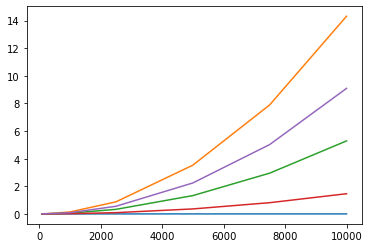

In [10]:
xpoints = results_df["List Length"]
ypoints = results_df.drop(columns = ["List Length"])

plt.plot(xpoints, ypoints)
plt.show()

OK, it's still the worst. But it did cut a third off the time to run on length 10000. so that's something 